![](https://i.imgur.com/JsMvGnP.png)

# Dataset
* The dataset contains 13 informations about Boston housing.
* Size: 506 rows and 13 columns

* Variables:

    RIM: per capita crime rate by town

    ZN: proportion of residential land zoned for lots over 25,000 sq.ft

    INDUS: proportion of non-retail business acres per town

    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

    NOX: nitrogen oxides concentration (parts per 10 million)

    RM: average number of rooms per dwelling.

    AGE: proportion of owner-occupied units built prior to 1940

    DIS: weighted mean of distances to five Boston employment centres

    RAD: index of accessibility to radial highways

    TAX: full-value property-tax rate per \$10,000

    PTRATIO: pupil-teacher ratio by town

    LSTAT: lower status of the population (percent)

    MEDV: median value of owner-occupied homes in \$1000s


* Goals:

    - Predictor variable = mean housing price value (MEDV)
    - Features = 12 columns


## Task 01
* Import libs

In [2]:
# Install
!pip install scikit-learn

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Task 02
* import document as 'houses'
* print the DF's header

In [4]:
# Accesing document
houses = pd.read_csv('houses.csv', sep=',')
houses.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Task 03
* Confirm the DF dimensions 

In [5]:
# Checking DF size
houses.shape


(506, 13)

### Task 04
* Verify missing values

In [6]:
# Cheking DF infos
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Task 05
* Get statistics information from DF

In [7]:
# General stats
houses.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

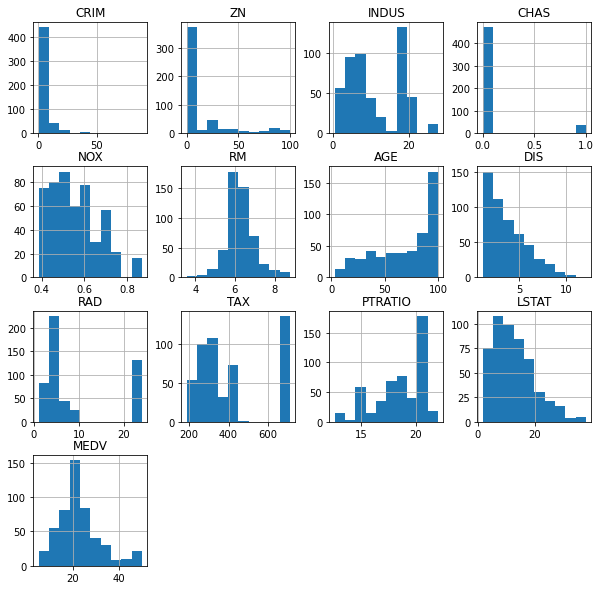

In [9]:
# histogram
houses.hist(figsize=(10,10))

## Task 06
* Create pairplot with the variables: 'RM', 'LSTAT', 'PTRATIO' and 'MEDV'

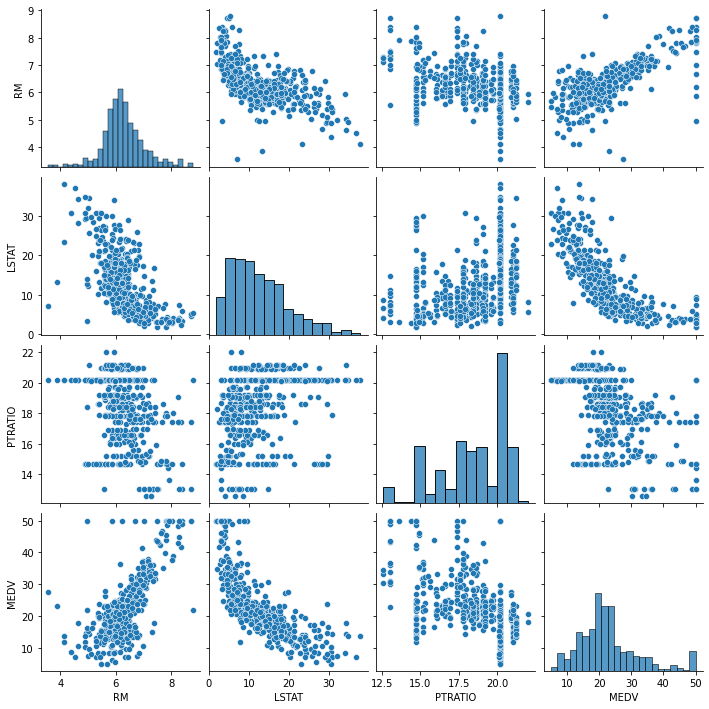

In [25]:
# Analysing variables distribution and correlation
x = houses[['RM', 'LSTAT', 'PTRATIO', 'MEDV']]
sns.pairplot(x)

* 'RM' & 'MEDV' = positive correlation
* 'LSTAT' & 'MEDV' = negative correlation

## Task 07

* Plot the relationship between the features and target

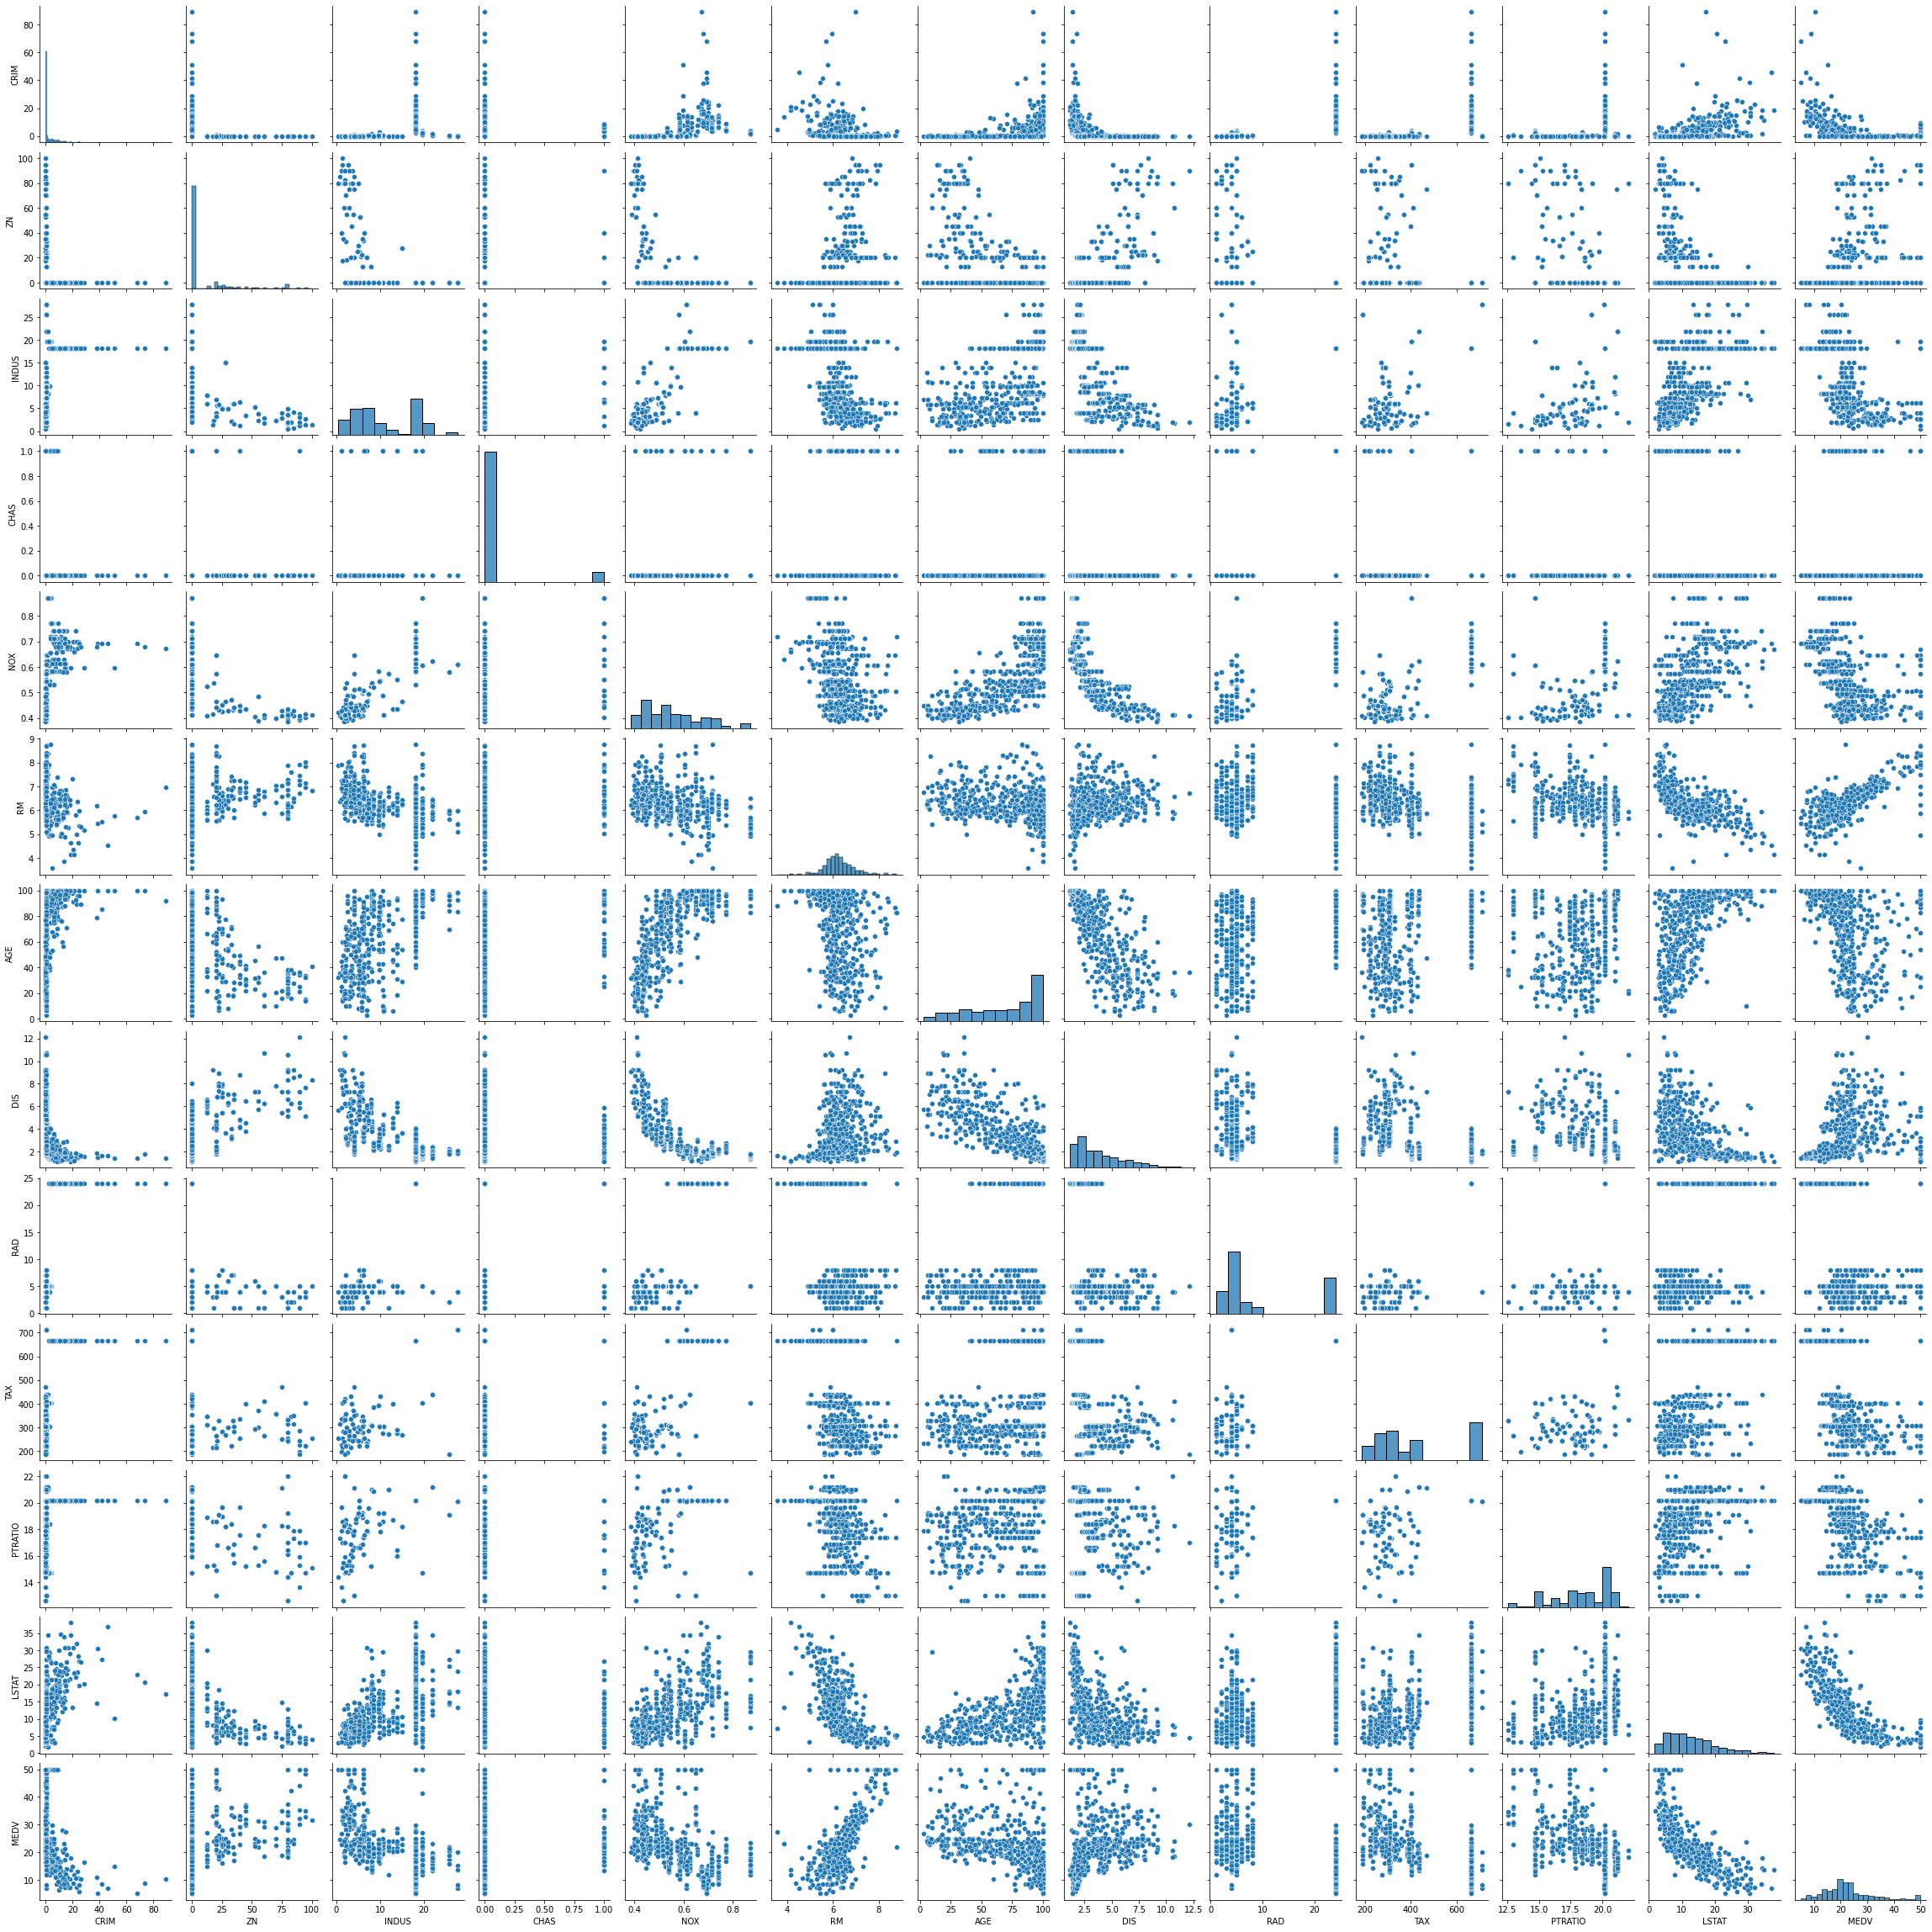

In [26]:
sns.pairplot(houses)

## Task 08
* Create correlation matrix & plot heatmap

<AxesSubplot:>

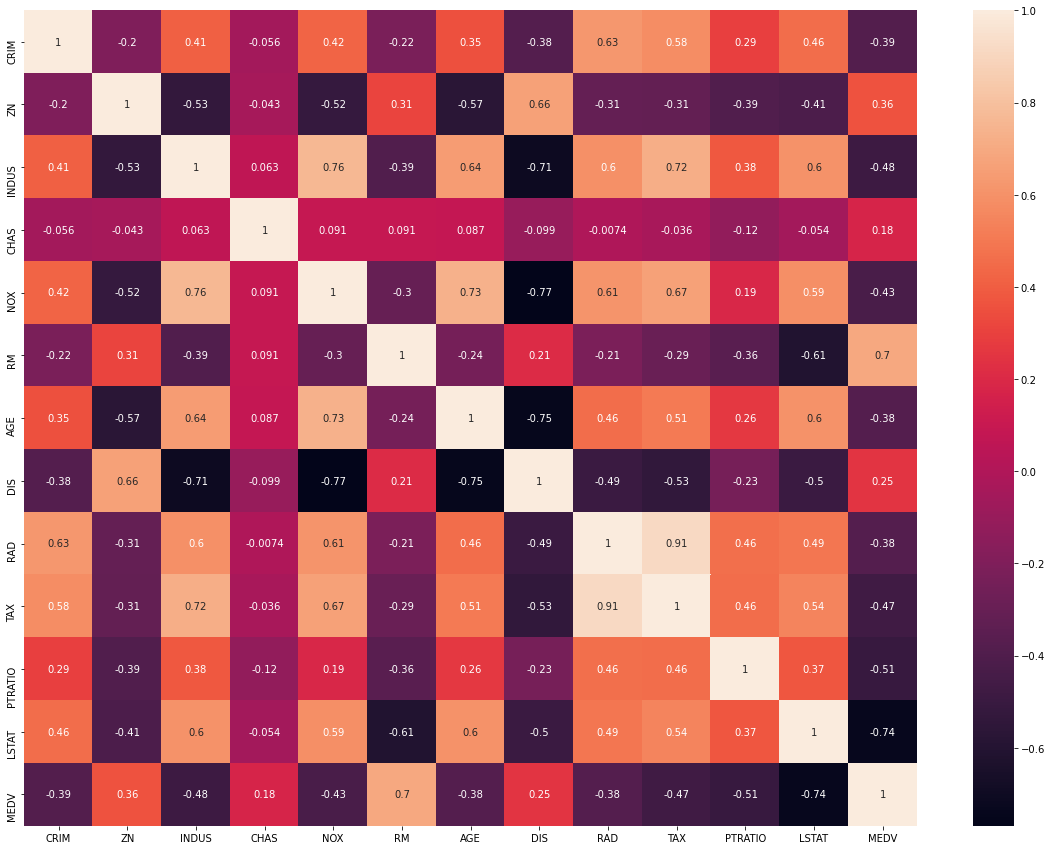

In [29]:
# Analysing the correlation
plt.figure(figsize=(20, 15))
_ = houses.corr()
sns.heatmap(_, annot=True)

## Task 09
* Create a scatter plot for LSTAT, RM and MEDV
* Use subplots, plt and sns

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

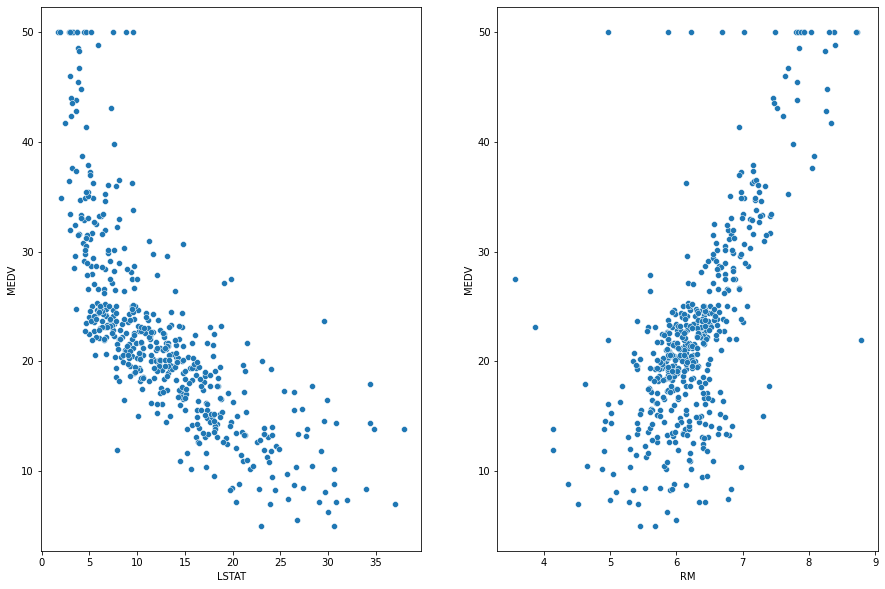

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15,10)) 
sns.scatterplot(x = houses['LSTAT'], y= houses['MEDV'], ax=axs[0])
sns.scatterplot(x = houses['RM'], y =  houses['MEDV'], ax=axs[1])

* RM seems positively correlated to target, but has a limit value of 50
* LSTAT seems negatively correlated to target, although not linear

## Task 10

* Create a distplot with target distribution

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

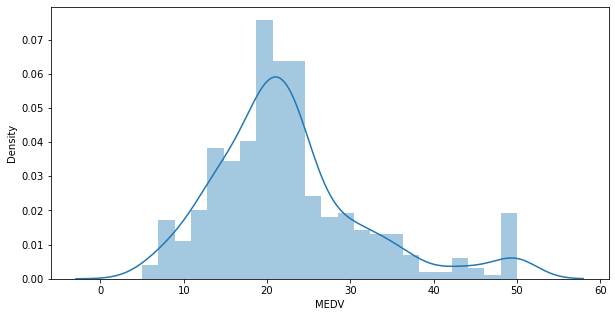

In [52]:
# Traget distribution
plt.figure(figsize=(10,5))
sns.distplot(houses['MEDV'])


## Task 11
* Split DF to train and test (80/20)

In [15]:
train, test = train_test_split(houses,train_size=0.8)

X_train, X_test, y_train, y_test = train_test_split(houses[['LSTAT','RM']], houses['MEDV'], train_size=0.8, random_state=1)

## Task 12
* Apply the linear regression algorithm with x and y train data


In [16]:
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

## Task 13
* Use the train data to predict the target on test data
* Use the R-squared score to analyse the result

In [20]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81,35.4
473,4.64689,0.0,18.10,0,0.614,6.980,67.6,2.5329,24,666,20.2,11.66,29.8
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,13.59,24.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9
485,3.67367,0.0,18.10,0,0.583,6.312,51.9,3.9917,24,666,20.2,10.58,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,8.61,30.3
126,0.38735,0.0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,27.26,15.7
438,13.67810,0.0,18.10,0,0.740,5.935,87.9,1.8206,24,666,20.2,34.02,8.4
62,0.11027,25.0,5.13,0,0.453,6.456,67.8,7.2255,8,284,19.7,6.73,22.2


In [24]:
model.score(X_train, y_train)

0.6251836356449056

## Task 14
* Use the train data to predict the target on test data
* Use the R-squared score to analyse the result

In [27]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.6753556251471675